# Model Evaluation and Selection
## Lecture Notebook Part 5 of 6

---

## Learning Objectives

By the end of this notebook, you will be able to:
1. Understand cross-validation and its importance
2. Implement different cross-validation strategies
3. Perform hyperparameter tuning using various methods
4. Compare and select models effectively
5. Understand the bias-variance tradeoff in model selection
6. Apply best practices for model evaluation

---

## 5.1 Cross-Validation

### What is Cross-Validation?

**Cross-validation** is a resampling technique used to assess how well a model will generalize to an independent dataset. Instead of using a single train-test split, cross-validation divides the data into multiple folds and evaluates the model on each fold, providing a more robust estimate of model performance.

The fundamental problem that cross-validation addresses is that a single train-test split can give misleading results. Depending on which data points end up in the training vs. test set, performance estimates can vary significantly. Cross-validation averages performance across multiple splits, giving a more reliable and stable estimate.

Cross-validation is essential for:
- **Model Selection**: Comparing different algorithms
- **Hyperparameter Tuning**: Finding optimal parameter values
- **Performance Estimation**: Getting reliable estimates of how well models will perform
- **Detecting Overfitting**: Identifying when models perform well on training data but poorly on validation data

### Types of Cross-Validation

#### k-Fold Cross-Validation

**k-Fold Cross-Validation** is the most common form. The data is divided into k equal-sized folds (typically k=5 or k=10). The algorithm:

1. **Split data into k folds**: Randomly divide dataset into k groups of approximately equal size.

2. **Train on k-1 folds, test on remaining fold**: For each of k iterations:
   - Use k-1 folds for training
   - Use remaining fold for testing
   - Calculate performance metric

3. **Repeat k times**: Each fold serves as test set exactly once.

4. **Average results**: Compute mean and standard deviation of performance across all k iterations.

**Advantages**:
- More reliable than single train-test split
- All data used for both training and testing
- Reduces variance in performance estimates
- Works well with moderate-sized datasets

**Disadvantages**:
- k times more computation than single split
- Still requires sufficient data (each fold needs enough samples)

**Choosing k**:
- **k=5 or k=10**: Most common choices, good balance between reliability and computation
- **Small k (k=3)**: Less computation but higher variance in estimates
- **Large k (k=20)**: More reliable but more computation, and folds may be too small

#### Stratified k-Fold Cross-Validation

**Stratified k-Fold** maintains the same class distribution in each fold as in the original dataset. This is crucial for:
- **Imbalanced datasets**: Ensures each fold has representative samples from all classes
- **Small datasets**: Prevents folds with only one class
- **Classification problems**: Maintains class balance across folds

Stratified cross-validation is especially important when classes are imbalanced, as random splitting might create folds with very few (or zero) samples from minority classes.

#### Leave-One-Out Cross-Validation (LOOCV)

**LOOCV** is the extreme case where k equals the number of samples (k=n). Each iteration uses n-1 samples for training and 1 sample for testing.

**Advantages**:
- Uses maximum data for training (n-1 samples)
- Deterministic (no randomness in fold creation)
- Unbiased estimate (each sample tested exactly once)

**Disadvantages**:
- Very computationally expensive (n models to train)
- High variance in estimates (each test set has only 1 sample)
- Can be slow for large datasets

**When to Use**: Small datasets where you want to use maximum data for training.

#### Time Series Cross-Validation

For time-dependent data, standard cross-validation can leak future information into the past. **Time Series Cross-Validation** respects temporal order:

- **Train on past, test on future**: Always use earlier data to predict later data
- **Expanding window**: Training set grows over time
- **Sliding window**: Fixed-size training window that slides forward

This prevents the model from "cheating" by using future information to predict the past.

### Benefits of Cross-Validation

**Better Performance Estimates**: Averaging across multiple folds provides more reliable estimates than a single split.

**Reduces Overfitting Risk**: Models are evaluated on data they haven't seen during training, helping identify overfitting.

**Helps with Hyperparameter Tuning**: Can evaluate different hyperparameter values across folds to find optimal settings.

**Uses Data Efficiently**: All data is used for both training and validation, maximizing information usage.

**Identifies Model Stability**: High variance across folds indicates the model is sensitive to data changes, suggesting potential issues.

---

## 5.2 Hyperparameter Tuning

### What are Hyperparameters?

**Hyperparameters** are parameters set before training begins, unlike model parameters (like coefficients in linear regression) which are learned during training. Hyperparameters control the learning process itself and significantly impact model performance.

**Examples of Hyperparameters**:
- **Regularization strength** (C, alpha, lambda): Controls overfitting in Ridge, Lasso, SVM
- **Tree depth** (max_depth): Maximum depth of decision trees
- **Number of neighbors** (k): For k-NN algorithm
- **Learning rate**: Step size in gradient descent
- **Number of trees** (n_estimators): For Random Forest
- **Kernel parameters**: For SVM (gamma, degree)

**Why Tuning Matters**: Poor hyperparameter choices can lead to:
- Underfitting (model too simple)
- Overfitting (model too complex)
- Poor generalization performance
- Wasted computational resources

### Tuning Methods

#### Grid Search

**Grid Search** performs exhaustive search over a specified parameter grid. It:

1. **Define parameter grid**: Specify values to try for each hyperparameter
2. **Generate all combinations**: Create all possible combinations of parameter values
3. **Evaluate each combination**: Train model and evaluate using cross-validation
4. **Select best**: Choose combination with best performance

**Advantages**:
- Guaranteed to find best combination within grid
- Simple to understand and implement
- Works well when parameter space is small

**Disadvantages**:
- Computationally expensive (exponential in number of parameters)
- May miss optimal values between grid points
- Doesn't scale well with many hyperparameters

**Example**: For SVM with C and gamma:
- C: [0.1, 1, 10, 100]
- gamma: [0.001, 0.01, 0.1, 1]
- Total combinations: 4 × 4 = 16 models to train

#### Random Search

**Random Search** randomly samples hyperparameter combinations from specified distributions:

1. **Define parameter distributions**: Specify ranges/distributions for each parameter
2. **Randomly sample combinations**: Generate random parameter combinations
3. **Evaluate sampled combinations**: Train and evaluate models
4. **Select best**: Choose best performing combination

**Advantages**:
- More efficient than grid search (can find good solutions faster)
- Better coverage of parameter space
- Can specify distributions (not just discrete values)
- Scales better with many hyperparameters

**Disadvantages**:
- May miss optimal combinations
- Less systematic than grid search
- Requires more iterations to be confident

**When to Use**: When parameter space is large or when computational resources are limited.

#### Bayesian Optimization

**Bayesian Optimization** uses probabilistic models to guide search:

1. **Build probabilistic model**: Model the relationship between hyperparameters and performance
2. **Use acquisition function**: Choose next hyperparameters to evaluate based on model
3. **Update model**: Incorporate new results
4. **Iterate**: Continue until convergence or budget exhausted

**Advantages**:
- More efficient than random search
- Learns from previous evaluations
- Better for expensive evaluations
- Can handle continuous and discrete parameters

**Disadvantages**:
- More complex to implement
- Requires more setup
- May get stuck in local optima

**When to Use**: When model training is expensive and you want to minimize evaluations.

### Best Practices

**Use Cross-Validation**: Always use cross-validation (not single train-test split) for hyperparameter tuning to get reliable estimates.

**Separate Validation Set**: Keep a separate test set that's never used during hyperparameter tuning. Only use it for final evaluation.

**Start with Coarse Search**: Begin with wide parameter ranges, then refine around promising regions.

**Consider Computational Cost**: Balance search thoroughness with available resources.

**Monitor for Overfitting**: If validation performance much better than test performance, you may be overfitting to validation set.

---

## 5.3 Model Comparison and Selection

### Comparing Models

When comparing models, consider multiple factors:

**Performance Metrics**:
- Primary metric (e.g., accuracy, F1-score, RMSE)
- Secondary metrics (e.g., precision, recall, training time)
- Performance on different data subsets (train vs. validation vs. test)

**Computational Cost**:
- **Training Time**: How long does it take to train?
- **Prediction Time**: How fast are predictions?
- **Memory Usage**: How much memory does the model require?

**Interpretability**:
- Can stakeholders understand the model?
- Are predictions explainable?
- Is feature importance available?

**Data Characteristics**:
- Does model handle your data type well?
- Can it handle missing values?
- Does it require feature scaling?

**Robustness**:
- How sensitive is the model to data changes?
- Does it handle outliers well?
- Is performance stable across different data splits?

### Bias-Variance Tradeoff Revisited

The **bias-variance tradeoff** is fundamental to model selection:

**Bias**: Error from overly simplistic assumptions. High bias causes underfitting.
- **Low Bias**: Model can capture complex patterns
- **High Bias**: Model too simple, misses patterns

**Variance**: Error from sensitivity to small fluctuations in training set. High variance causes overfitting.
- **Low Variance**: Model stable across different training sets
- **High Variance**: Model changes significantly with small data changes

**Tradeoff**:
- **Simple Models** (e.g., linear regression): Low variance, high bias
- **Complex Models** (e.g., deep neural networks): Low bias, high variance
- **Goal**: Find balance that minimizes total error

**Total Error = Bias² + Variance + Irreducible Error**

The irreducible error is inherent to the problem and cannot be reduced.

### Occam's Razor

**Occam's Razor** principle: When two models perform similarly, prefer the simpler one.

**Why Simpler is Often Better**:
- **Better Generalization**: Simpler models often generalize better
- **Easier to Interpret**: Stakeholders can understand and trust the model
- **Less Prone to Overfitting**: Simpler models have fewer parameters to overfit
- **Easier to Maintain**: Simpler models are easier to debug and update
- **Faster**: Simpler models are usually faster to train and predict

**When Complexity is Justified**:
- Simple models clearly underperform
- Problem genuinely requires complex relationships
- You have sufficient data to support complexity
- Computational resources allow for complex models

### Model Selection Workflow

1. **Define Problem and Metrics**: Clearly define what success looks like and how to measure it.

2. **Prepare Data**: Clean, preprocess, and split data appropriately.

3. **Try Multiple Algorithms**: Don't commit to one algorithm too early. Try several:
   - Simple baseline (e.g., logistic regression, linear regression)
   - More complex models (e.g., random forest, SVM)
   - Ensemble methods if appropriate

4. **Use Cross-Validation**: Evaluate all models using cross-validation for fair comparison.

5. **Tune Hyperparameters**: Optimize hyperparameters for promising models.

6. **Compare on Test Set**: Final comparison on held-out test set (used only once).

7. **Consider Practical Factors**: Beyond performance, consider interpretability, speed, maintenance.

8. **Select Final Model**: Choose model that best balances all factors.

---

## Summary and Key Takeaways

1. **Cross-Validation** provides more reliable performance estimates than single train-test splits.

2. **Stratified Cross-Validation** is essential for imbalanced classification problems.

3. **Hyperparameter Tuning** significantly impacts model performance and should use cross-validation.

4. **Grid Search** is exhaustive but expensive; **Random Search** is more efficient for large parameter spaces.

5. **Model Comparison** should consider performance, computational cost, interpretability, and robustness.

6. **Bias-Variance Tradeoff** guides model complexity selection - balance between underfitting and overfitting.

7. **Occam's Razor** suggests preferring simpler models when performance is similar.

8. **Proper Workflow** separates training, validation, and test sets, using each appropriately.

---

## Further Reading

- James, G., et al. (2013). *An Introduction to Statistical Learning*. Springer.
- Scikit-learn Model Selection Documentation: https://scikit-learn.org/stable/model_selection.html

---

## Practice Exercises

1. Why is cross-validation important? What problems does it solve?

2. When would you use stratified cross-validation instead of regular k-fold?

3. Compare grid search and random search. When would you use each?

4. Explain the bias-variance tradeoff. How does it relate to model selection?

5. Why might a simpler model be preferred over a more complex one, even if the complex model performs slightly better?


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (train_test_split, cross_val_score,
                                     KFold, StratifiedKFold, GridSearchCV,
                                     RandomizedSearchCV)
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, make_scorer
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")
print("Ready to explore model evaluation and selection!")


Libraries imported successfully!
Ready to explore model evaluation and selection!


### Example 1: k-Fold Cross-Validation

Demonstrating k-fold cross-validation:


5-Fold Cross-Validation Results:
Fold scores: [0.76875 0.79375 0.81875 0.85625 0.825  ]
Mean CV Score: 0.8125 ± 0.0296
Min Score: 0.7688
Max Score: 0.8562

Single Train-Test Split Score: 0.8350

CV provides more reliable estimate with mean: 0.8125


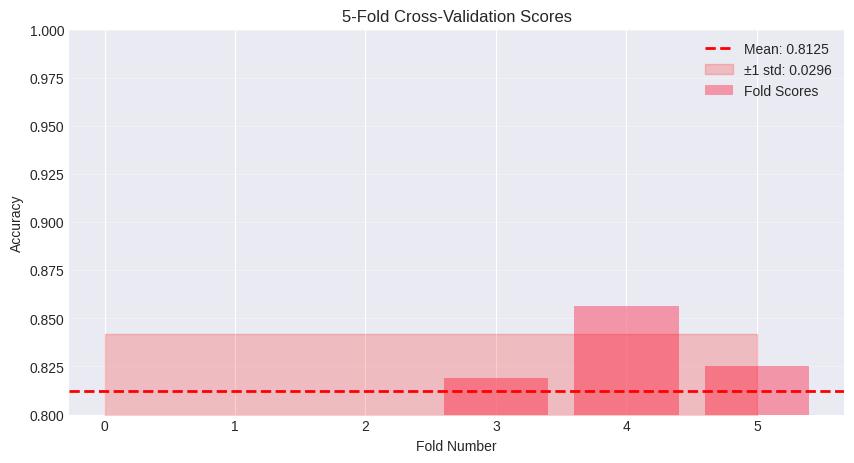

In [ ]:
# Generate classification dataset
X_cv, y_cv = make_classification(n_samples=1000, n_features=10, n_informative=5,
                                 n_redundant=2, random_state=42)

# Split into train and test (test set never used in CV)
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(
    X_cv, y_cv, test_size=0.2, random_state=42
)

# Scale features
scaler_cv = StandardScaler()
X_train_cv_scaled = scaler_cv.fit_transform(X_train_cv)
X_test_cv_scaled = scaler_cv.transform(X_test_cv)

# Train a model
model_cv = LogisticRegression(random_state=42, max_iter=1000)

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_cv, X_train_cv_scaled, y_train_cv,
                            cv=kf, scoring='accuracy')

print("5-Fold Cross-Validation Results:")
print(f"Fold scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print(f"Min Score: {cv_scores.min():.4f}")
print(f"Max Score: {cv_scores.max():.4f}")

# Compare with single train-test split
model_single = LogisticRegression(random_state=42, max_iter=1000)
model_single.fit(X_train_cv_scaled, y_train_cv)
single_score = accuracy_score(y_test_cv, model_single.predict(X_test_cv_scaled))

print(f"\nSingle Train-Test Split Score: {single_score:.4f}")
print(f"\nCV provides more reliable estimate with mean: {cv_scores.mean():.4f}")

# Visualize CV scores
plt.figure(figsize=(10, 5))
plt.bar(range(1, 6), cv_scores, alpha=0.7, label='Fold Scores')
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', linewidth=2,
           label=f'Mean: {cv_scores.mean():.4f}')
plt.fill_between(range(0, 6), cv_scores.mean() - cv_scores.std(),
                 cv_scores.mean() + cv_scores.std(), alpha=0.2, color='red',
                 label=f'±1 std: {cv_scores.std():.4f}')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross-Validation Scores')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.ylim([0.8, 1.0])
plt.show()


### Example 2: Stratified k-Fold Cross-Validation

Demonstrating stratified cross-validation for imbalanced data:


Class distribution: [896 104]
Class 0: 896 samples (89.6%)
Class 1: 104 samples (10.4%)

Regular K-Fold CV Scores:
  Scores: [0.9125  0.95    0.85625 0.9375  0.88125]
  Mean: 0.9075 ± 0.0348

Stratified K-Fold CV Scores:
  Scores: [0.9     0.925   0.9     0.91875 0.9125 ]
  Mean: 0.9112 ± 0.0100

Class distribution in first fold (Regular K-Fold):
  Train: [572  68]
  Val: [145  15]

Class distribution in first fold (Stratified K-Fold):
  Train: [573  67]
  Val: [144  16]


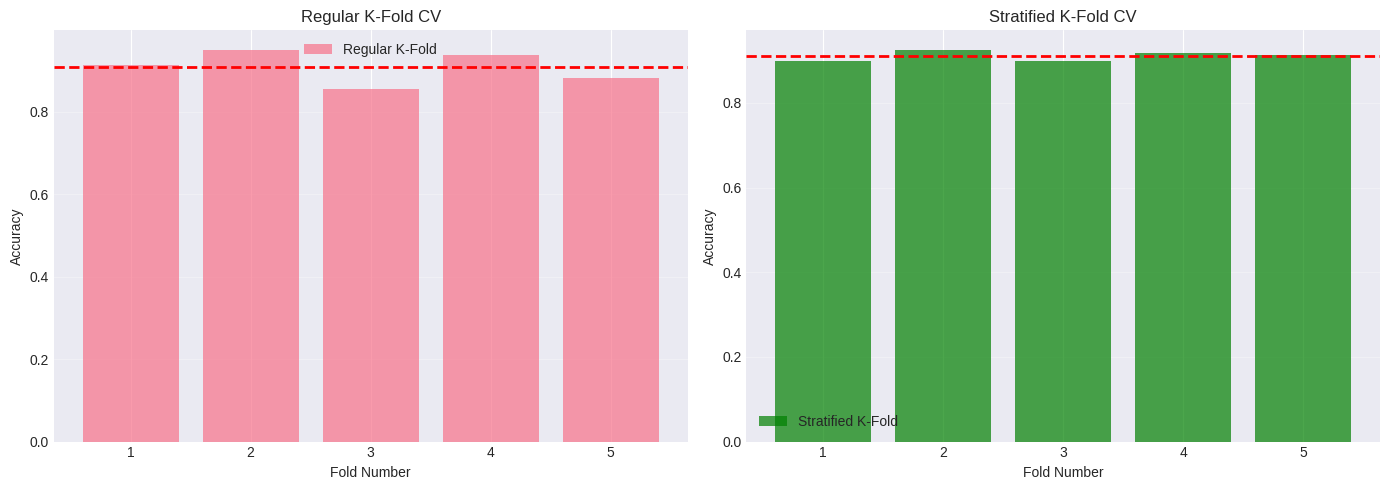


Observations:
- Stratified K-Fold ensures each fold has similar class distribution
- Important for imbalanced datasets to get reliable estimates
- Regular K-Fold may create folds with very few minority class samples


In [ ]:
# Create imbalanced dataset
X_imbal, y_imbal = make_classification(n_samples=1000, n_features=10, n_informative=5,
                                        n_redundant=2, weights=[0.9, 0.1],
                                        random_state=42)

print(f"Class distribution: {np.bincount(y_imbal)}")
print(f"Class 0: {np.sum(y_imbal == 0)} samples ({np.sum(y_imbal == 0)/len(y_imbal)*100:.1f}%)")
print(f"Class 1: {np.sum(y_imbal == 1)} samples ({np.sum(y_imbal == 1)/len(y_imbal)*100:.1f}%)")

X_train_imbal, X_test_imbal, y_train_imbal, y_test_imbal = train_test_split(
    X_imbal, y_imbal, test_size=0.2, random_state=42, stratify=y_imbal
)

scaler_imbal = StandardScaler()
X_train_imbal_scaled = scaler_imbal.fit_transform(X_train_imbal)
X_test_imbal_scaled = scaler_imbal.transform(X_test_imbal)

model_imbal = LogisticRegression(random_state=42, max_iter=1000)

# Regular k-fold (may have imbalanced folds)
kf_regular = KFold(n_splits=5, shuffle=True, random_state=42)
cv_regular = cross_val_score(model_imbal, X_train_imbal_scaled, y_train_imbal,
                            cv=kf_regular, scoring='accuracy')

# Stratified k-fold (maintains class distribution)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_stratified = cross_val_score(model_imbal, X_train_imbal_scaled, y_train_imbal,
                               cv=skf, scoring='accuracy')

print("\nRegular K-Fold CV Scores:")
print(f"  Scores: {cv_regular}")
print(f"  Mean: {cv_regular.mean():.4f} ± {cv_regular.std():.4f}")

print("\nStratified K-Fold CV Scores:")
print(f"  Scores: {cv_stratified}")
print(f"  Mean: {cv_stratified.mean():.4f} ± {cv_stratified.std():.4f}")

# Check class distribution in folds
print("\nClass distribution in first fold (Regular K-Fold):")
for train_idx, val_idx in kf_regular.split(X_train_imbal_scaled, y_train_imbal):
    print(f"  Train: {np.bincount(y_train_imbal[train_idx])}")
    print(f"  Val: {np.bincount(y_train_imbal[val_idx])}")
    break

print("\nClass distribution in first fold (Stratified K-Fold):")
for train_idx, val_idx in skf.split(X_train_imbal_scaled, y_train_imbal):
    print(f"  Train: {np.bincount(y_train_imbal[train_idx])}")
    print(f"  Val: {np.bincount(y_train_imbal[val_idx])}")
    break

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(range(1, 6), cv_regular, alpha=0.7, label='Regular K-Fold')
axes[0].axhline(y=cv_regular.mean(), color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Fold Number')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Regular K-Fold CV')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(range(1, 6), cv_stratified, alpha=0.7, color='green', label='Stratified K-Fold')
axes[1].axhline(y=cv_stratified.mean(), color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Fold Number')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Stratified K-Fold CV')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nObservations:")
print("- Stratified K-Fold ensures each fold has similar class distribution")
print("- Important for imbalanced datasets to get reliable estimates")
print("- Regular K-Fold may create folds with very few minority class samples")


### Example 3: Grid Search for Hyperparameter Tuning

Demonstrating grid search with cross-validation:


Total combinations: 32
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.9125
Test set score: 0.9350

Top 5 parameter combinations:
 param_C  param_gamma param_kernel  mean_test_score  std_test_score
    10.0         0.10          rbf          0.91250        0.018114
     1.0         0.10          rbf          0.90500        0.013919
   100.0         0.01          rbf          0.90250        0.016583
   100.0         0.10          rbf          0.89750        0.024238
     0.1         0.10          rbf          0.88125        0.017678


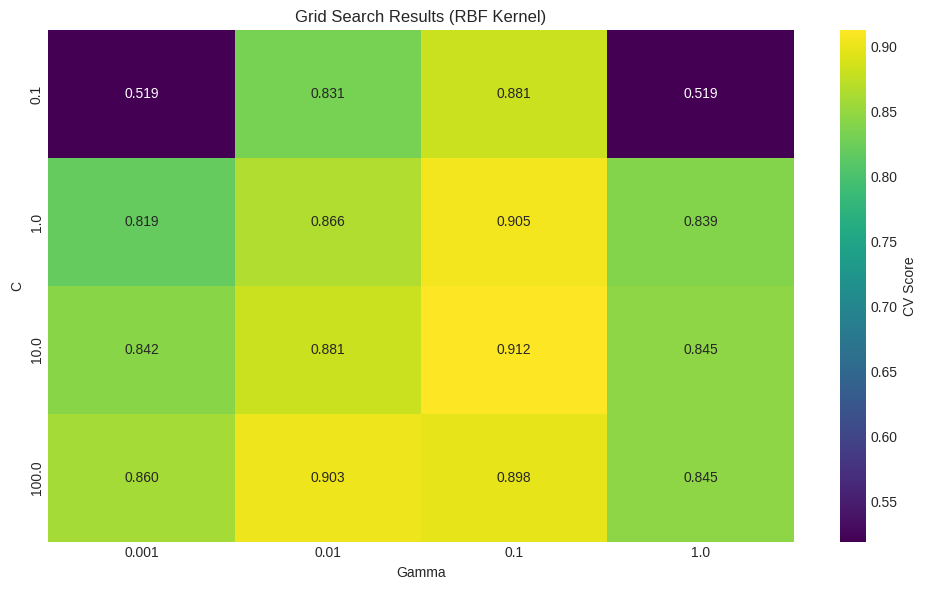

In [ ]:
# Generate dataset
X_gs, y_gs = make_classification(n_samples=1000, n_features=10, n_informative=5,
                                 random_state=42)

X_train_gs, X_test_gs, y_train_gs, y_test_gs = train_test_split(
    X_gs, y_gs, test_size=0.2, random_state=42
)

scaler_gs = StandardScaler()
X_train_gs_scaled = scaler_gs.fit_transform(X_train_gs)
X_test_gs_scaled = scaler_gs.transform(X_test_gs)

# Define parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

print(f"Total combinations: {len(param_grid['C']) * len(param_grid['gamma']) * len(param_grid['kernel'])}")

# Perform grid search with cross-validation
svm = SVC(random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy',
                          n_jobs=-1, verbose=1)
grid_search.fit(X_train_gs_scaled, y_train_gs)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Evaluate on test set
best_model = grid_search.best_estimator_
test_score = accuracy_score(y_test_gs, best_model.predict(X_test_gs_scaled))
print(f"Test set score: {test_score:.4f}")

# Visualize results
results_df = pd.DataFrame(grid_search.cv_results_)
print(f"\nTop 5 parameter combinations:")
top_5 = results_df.nlargest(5, 'mean_test_score')[['param_C', 'param_gamma',
                                                    'param_kernel', 'mean_test_score',
                                                    'std_test_score']]
print(top_5.to_string(index=False))

# Plot results for RBF kernel
rbf_results = results_df[results_df['param_kernel'] == 'rbf']
pivot_table = rbf_results.pivot_table(values='mean_test_score',
                                      index='param_C',
                                      columns='param_gamma')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='viridis', cbar_kws={'label': 'CV Score'})
plt.title('Grid Search Results (RBF Kernel)')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.tight_layout()
plt.show()


### Example 4: Random Search for Hyperparameter Tuning

Comparing random search with grid search:


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Random Search Results:
Best parameters: {'C': np.float64(85.68869785189007), 'gamma': np.float64(0.025135566617708285), 'kernel': 'rbf'}
Best cross-validation score: 0.9150

Comparison:
Grid Search best score: 0.9125
Random Search best score: 0.9150

Grid Search evaluated 32 combinations
Random Search evaluated 20 combinations


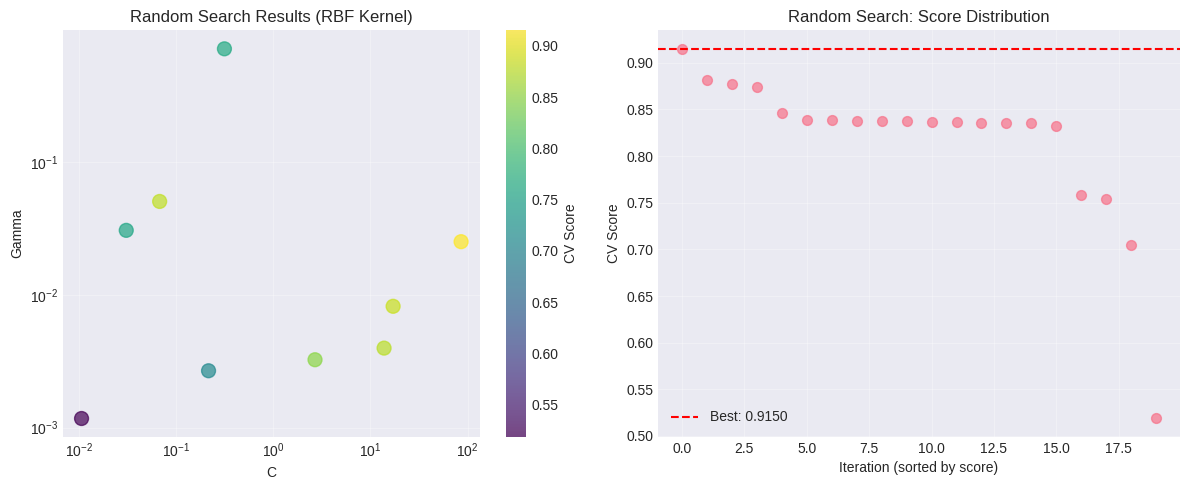


Observations:
- Random search can find good solutions with fewer evaluations
- More efficient for large parameter spaces
- Can explore continuous parameter spaces better
- May miss optimal combinations but often finds good ones faster


In [ ]:
from scipy.stats import uniform, loguniform

# Same dataset
X_rs = X_train_gs_scaled
y_rs = y_train_gs

# Define parameter distributions for random search
param_distributions = {
    'C': loguniform(0.01, 100),  # Log-uniform distribution
    'gamma': loguniform(0.001, 1),
    'kernel': ['rbf', 'linear']
}

# Perform random search
svm_rs = SVC(random_state=42)
random_search = RandomizedSearchCV(svm_rs, param_distributions,
                                   n_iter=20, cv=5, scoring='accuracy',
                                   random_state=42, n_jobs=-1, verbose=1)
random_search.fit(X_rs, y_rs)

print(f"\nRandom Search Results:")
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.4f}")

# Compare with grid search
print(f"\nComparison:")
print(f"Grid Search best score: {grid_search.best_score_:.4f}")
print(f"Random Search best score: {random_search.best_score_:.4f}")
print(f"\nGrid Search evaluated {len(grid_search.cv_results_['params'])} combinations")
print(f"Random Search evaluated {len(random_search.cv_results_['params'])} combinations")

# Visualize random search results
rs_results_df = pd.DataFrame(random_search.cv_results_)
rs_rbf = rs_results_df[rs_results_df['param_kernel'] == 'rbf']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(rs_rbf['param_C'], rs_rbf['param_gamma'],
           c=rs_rbf['mean_test_score'], s=100, cmap='viridis', alpha=0.7)
plt.colorbar(label='CV Score')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('C')
plt.ylabel('Gamma')
plt.title('Random Search Results (RBF Kernel)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(range(len(rs_results_df)), rs_results_df['mean_test_score'].sort_values(ascending=False),
           s=50, alpha=0.7)
plt.axhline(y=random_search.best_score_, color='r', linestyle='--',
           label=f'Best: {random_search.best_score_:.4f}')
plt.xlabel('Iteration (sorted by score)')
plt.ylabel('CV Score')
plt.title('Random Search: Score Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservations:")
print("- Random search can find good solutions with fewer evaluations")
print("- More efficient for large parameter spaces")
print("- Can explore continuous parameter spaces better")
print("- May miss optimal combinations but often finds good ones faster")


### Example 5: Model Comparison

Comparing multiple models using cross-validation:


Logistic Regression: 0.8125 ± 0.0282
Decision Tree: 0.8562 ± 0.0324
Random Forest: 0.9275 ± 0.0233
SVM (RBF): 0.8975 ± 0.0170


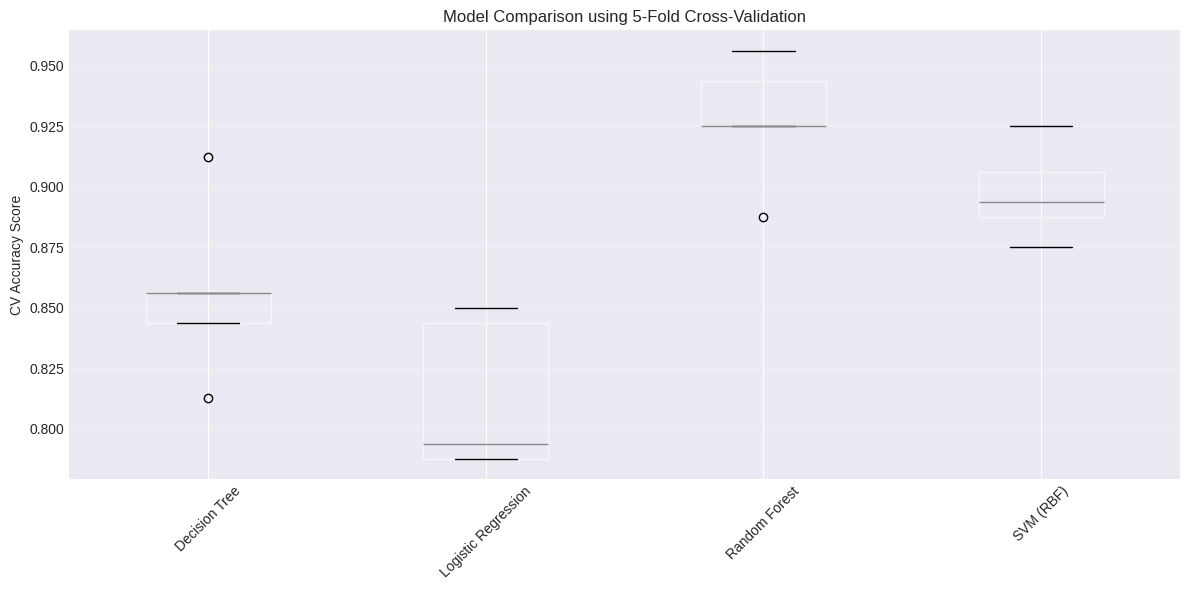

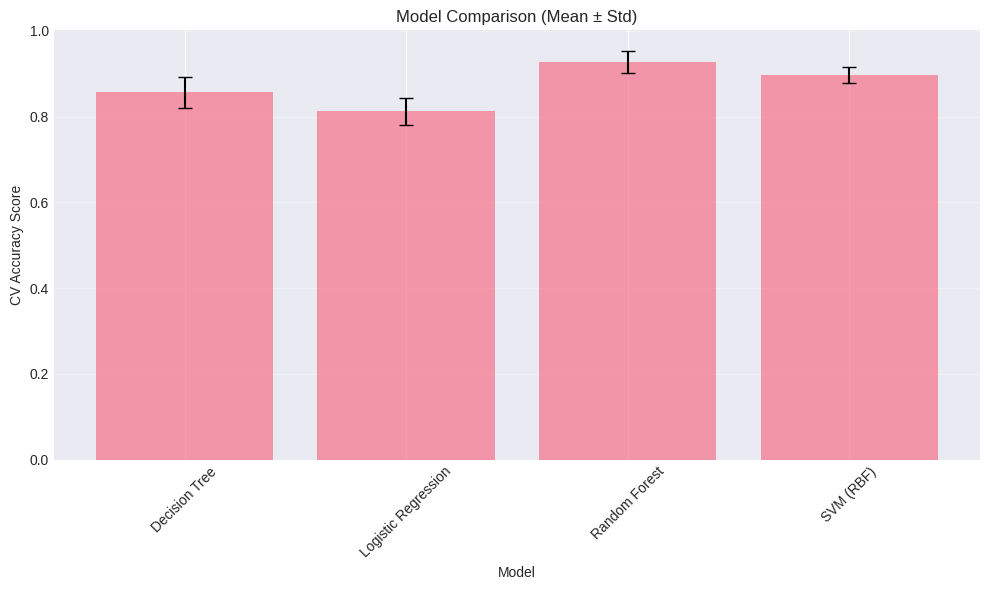


Final Test Set Evaluation:
Logistic Regression: 0.8350
Decision Tree: 0.9100
Random Forest: 0.9450
SVM (RBF): 0.9400

Observations:
- Cross-validation provides fair comparison across models
- Consider both mean performance and variance (stability)
- Test set should only be used once for final evaluation
- Choose model based on performance, interpretability, and computational cost


In [ ]:
# Generate dataset
X_compare, y_compare = make_classification(n_samples=1000, n_features=10,
                                          n_informative=5, random_state=42)

X_train_comp, X_test_comp, y_train_comp, y_test_comp = train_test_split(
    X_compare, y_compare, test_size=0.2, random_state=42
)

scaler_comp = StandardScaler()
X_train_comp_scaled = scaler_comp.fit_transform(X_train_comp)
X_test_comp_scaled = scaler_comp.transform(X_test_comp)

# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42)
}

# Perform cross-validation for each model
cv_results = {}
skf_comp = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    if name == 'SVM (RBF)':
        # SVM needs scaling
        scores = cross_val_score(model, X_train_comp_scaled, y_train_comp,
                                cv=skf_comp, scoring='accuracy')
    else:
        scores = cross_val_score(model, X_train_comp, y_train_comp,
                                cv=skf_comp, scoring='accuracy')
    cv_results[name] = scores
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")

# Visualize comparison
results_df_comp = pd.DataFrame(cv_results)
results_df_comp = results_df_comp.reindex(columns=sorted(results_df_comp.columns))

plt.figure(figsize=(12, 6))
results_df_comp.boxplot(ax=plt.gca())
plt.ylabel('CV Accuracy Score')
plt.title('Model Comparison using 5-Fold Cross-Validation')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()
print(" ")

# Bar plot with error bars
means = results_df_comp.mean()
stds = results_df_comp.std()

plt.figure(figsize=(10, 6))
x_pos = np.arange(len(means))
plt.bar(x_pos, means, yerr=stds, alpha=0.7, capsize=5)
plt.xlabel('Model')
plt.ylabel('CV Accuracy Score')
plt.title('Model Comparison (Mean ± Std)')
plt.xticks(x_pos, means.index, rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


# Final evaluation on test set
print("\nFinal Test Set Evaluation:")
for name, model in models.items():
    if name == 'SVM (RBF)':
        model.fit(X_train_comp_scaled, y_train_comp)
        test_pred = model.predict(X_test_comp_scaled)
    else:
        model.fit(X_train_comp, y_train_comp)
        test_pred = model.predict(X_test_comp)
    test_acc = accuracy_score(y_test_comp, test_pred)
    print(f"{name}: {test_acc:.4f}")

print("\nObservations:")
print("- Cross-validation provides fair comparison across models")
print("- Consider both mean performance and variance (stability)")
print("- Test set should only be used once for final evaluation")
print("- Choose model based on performance, interpretability, and computational cost")
